GA 분석 보고서: https://www.notion.so/GA-_250211-197d5beeb0c0801e8e61f61121fd0e89

아하모먼트: https://www.notion.so/A-ha-197d5beeb0c080ab9231e5ca672fb960

In [1]:
# 라이브러리 설치
!pip install koreanize-matplotlib
!pip install youtube-transcript-api
!pip install google-api-python-client pandas isodate
!pip install pytrends
!pip install pytrends matplotlib
!pip install beautifulsoup4 requests
!pip install konlpy
!pip install ace_tools

# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt install fonts-nanum fonts-nanum-extra
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 30.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 1s (56.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories curre

In [2]:
import pandas as pd

# CSV 파일 로드
file_path = "ga_innercircle_parsed_250212.csv"  # 파일 경로에 맞게 수정 필요
df = pd.read_csv(file_path)

# event_name 컬럼 확인 및 중복 제거
if 'event_name' in df.columns:
    unique_event_names = df['event_name'].drop_duplicates().sort_values().reset_index(drop=True)

    # 데이터프레임으로 변환
    unique_event_names_df = pd.DataFrame(unique_event_names, columns=['event_name'])

    # 결과 확인
    print(unique_event_names_df)
else:
    print("event_name 컬럼이 데이터에 존재하지 않습니다.")


               event_name
0         account_connect
1                   click
2   dashboard_enter_click
3     dashboard_gnb_click
4     dashboard_lnb_click
5             first_visit
6            footer_click
7               gnb_click
8                   login
9               page_view
10       plan_start_click
11      project_add_click
12    report_detail_click
13    report_export_click
14                 scroll
15      section_btn_click
16          session_start
17      set_user_property
18                sign_up
19          support_click
20        user_engagement
21                    NaN


<ipython-input-2-cac419ce8b2a>:5: DtypeWarning: Columns (13,45,46,47,48,50,53,55,59,60,68,78,92,106,115,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [8]:
#비회원에서 회원으로 전환된 유저 로그데이터 추출
import pandas as pd

# 파일 경로
file_path = "ga_innercircle_parsed_250212.csv"  # 파일 경로를 맞게 수정하세요.

# CSV 파일 로드 (low_memory=False 옵션 추가)
df = pd.read_csv(file_path, low_memory=False)

# session_id 대신 event_params.ga_session_id 사용
df.rename(columns={'event_params.ga_session_id': 'session_id'}, inplace=True)

# event_timestamp을 datetime 형식으로 변환 (밀리초까지 표시)
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"], unit="us", errors='coerce')

# user_properties.user_group 값이 없는 경우 "비회원"으로 처리
df["user_properties.user_group"] = df["user_properties.user_group"].fillna("비회원")

# 같은 user_pseudo_id에 대해 user_group이 "비회원"에서 "회원"으로 변경된 경우 찾기
df["previous_user_group"] = df.groupby("user_pseudo_id")["user_properties.user_group"].shift(1)

# 비회원 → 회원으로 전환된 유저 필터링
user_group_changes = df[(df["previous_user_group"] == "비회원") & (df["user_properties.user_group"] == "회원")]

# 회원으로 전환된 user_pseudo_id 리스트 가져오기
converted_user_ids = user_group_changes["user_pseudo_id"].unique()

# 전환된 유저들의 전체 로그 필터링
converted_user_logs = df[df["user_pseudo_id"].isin(converted_user_ids)]

# 날짜 및 타임스탬프 기준으로 정렬
converted_user_logs = converted_user_logs.sort_values(by=["user_pseudo_id", "event_timestamp"])

# 결과 출력 (상위 5개 데이터 확인)
print(converted_user_logs.head())

# CSV 파일로 저장 (필요 시)
converted_user_logs.to_csv("converted_user_conversion.csv", index=False, encoding="utf-8-sig")
print("CSV 파일 저장 완료: converted_user_conversion.csv")


      event_date     event_timestamp      event_name+event_params_page_title  \
2082  20241219.0 2024-10-27 03:33:20          session_start브랜드의 성장박스 - 데이터너겟   
2083  20241219.0 2024-10-27 03:33:20      set_user_property브랜드의 성장박스 - 데이터너겟   
2084  20241219.0 2024-10-27 03:33:20              page_view브랜드의 성장박스 - 데이터너겟   
2085  20241219.0 2024-10-27 03:33:20              gnb_click브랜드의 성장박스 - 데이터너겟   
2086  20241219.0 2024-10-27 03:33:20  dashboard_enter_click브랜드의 성장박스 - 데이터너겟   

                 event_name  event_previous_timestamp  event_value_in_usd  \
2082          session_start                       NaN                 NaN   
2083      set_user_property                       NaN                 NaN   
2084              page_view                       NaN                 NaN   
2085              gnb_click                       NaN                 NaN   
2086  dashboard_enter_click                       NaN                 NaN   

      event_bundle_sequence_id  event_server_timestamp_o

In [7]:
#비회원에서 비회원으로 세션이 종료된 유저 추출
import pandas as pd

# 파일 경로
file_path = "ga_innercircle_parsed_250212.csv"  # 파일 경로를 맞게 수정하세요.

# CSV 파일 로드 (low_memory=False 옵션 포함)
df = pd.read_csv(file_path, low_memory=False)

# event_params.ga_session_id를 session_id로 사용
df.rename(columns={'event_params.ga_session_id': 'session_id'}, inplace=True)

# event_timestamp을 datetime 형식으로 변환 (밀리초까지 표시)
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"], unit="us", errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]

# user_properties.user_group 값이 없는 경우 "비회원"으로 처리
df["user_properties.user_group"] = df["user_properties.user_group"].fillna("비회원")

# 같은 user_pseudo_id에 대해 user_group이 "비회원"에서 "회원"으로 변경된 경우 찾기
df["previous_user_group"] = df.groupby("user_pseudo_id")["user_properties.user_group"].shift(1)

# 비회원 → 회원으로 전환된 유저 식별
converted_users = df[(df["previous_user_group"] == "비회원") & (df["user_properties.user_group"] == "회원")]["user_pseudo_id"].unique()

# 비회원으로 남아 세션 종료된 유저 식별
non_converted_users = df[~df["user_pseudo_id"].isin(converted_users)]

# 비회원으로 남은 유저들의 로그를 시간순으로 정렬
non_converted_user_logs = non_converted_users.sort_values(by=["user_pseudo_id", "event_timestamp"])

# 결과 출력
print(non_converted_user_logs.head())

# CSV 파일로 저장 (필요 시)
non_converted_user_logs.to_csv("converted_user_bounce.csv", index=False, encoding="utf-8-sig")
print("CSV 파일 저장 완료: converted_user_bounce.csv")


      event_date          event_timestamp event_name+event_params_page_title  \
5332  20241208.0  2024-10-27 03:33:20.000   user_engagement브랜드의 성장박스 - 데이터너겟   
1695  20250119.0  2025-02-19 21:20:00.000         page_view브랜드의 성장박스 - 데이터너겟   
1696  20250119.0  2025-02-19 21:20:00.000   user_engagement브랜드의 성장박스 - 데이터너겟   
1697  20250119.0  2025-02-19 21:20:00.000       first_visit브랜드의 성장박스 - 데이터너겟   
1698  20250119.0  2025-02-19 21:20:00.000     session_start브랜드의 성장박스 - 데이터너겟   

           event_name  event_previous_timestamp  event_value_in_usd  \
5332  user_engagement                       NaN                 NaN   
1695        page_view                       NaN                 NaN   
1696  user_engagement                       NaN                 NaN   
1697      first_visit                       NaN                 NaN   
1698    session_start                       NaN                 NaN   

      event_bundle_sequence_id  event_server_timestamp_offset  user_id  \
5332              

In [15]:
import pandas as pd

# 파일 로드
conversion = pd.read_csv("converted_user_conversion.csv", low_memory=False)
bounce = pd.read_csv("converted_user_bounce.csv", low_memory=False)

# 항상 event_params.ga_session_id를 session_id로 사용
conversion.rename(columns={'event_params.ga_session_id': 'session_id'}, inplace=True)
bounce.rename(columns={'event_params.ga_session_id': 'session_id'}, inplace=True)

# event_timestamp을 datetime 형식으로 변환 (밀리초까지 표시)
conversion["event_timestamp"] = pd.to_datetime(conversion["event_timestamp"], unit="us", errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]
bounce["event_timestamp"] = pd.to_datetime(bounce["event_timestamp"], unit="us", errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]

# user_properties.user_group 값이 없는 경우 "비회원"으로 처리
conversion["user_properties.user_group"] = conversion["user_properties.user_group"].fillna("비회원")
bounce["user_properties.user_group"] = bounce["user_properties.user_group"].fillna("비회원")

# event_name과 event_params.page_title 결합
conversion["event_page_combined"] = conversion["event_name"] + " - " + conversion["event_params.page_title"]
bounce["event_page_combined"] = bounce["event_name"] + " - " + bounce["event_params.page_title"]

print("✅ 데이터 로드 및 전처리 완료!")


✅ 데이터 로드 및 전처리 완료!


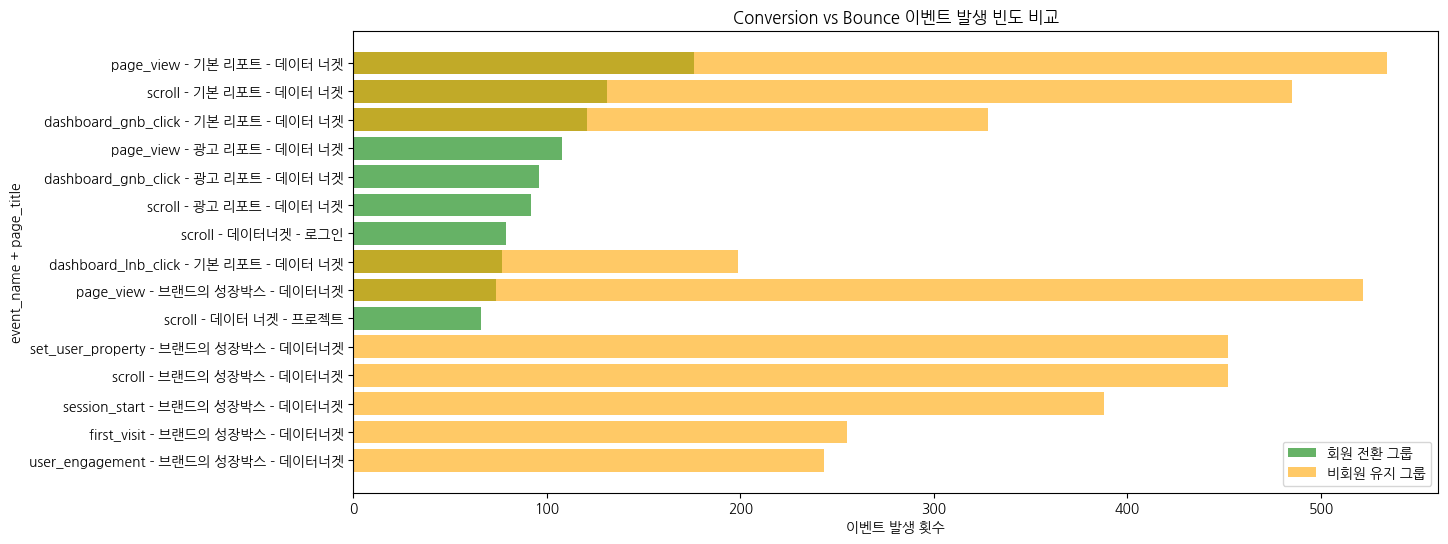

✅ 이벤트 발생 빈도 분석 완료: conversion_event_frequency.csv & bounce_event_frequency.csv


In [16]:
import matplotlib.pyplot as plt

# 이벤트 발생 빈도 분석
conversion_freq = conversion["event_page_combined"].value_counts().reset_index()
bounce_freq = bounce["event_page_combined"].value_counts().reset_index()

conversion_freq.columns = ["event_page_combined", "count"]
bounce_freq.columns = ["event_page_combined", "count"]

# 상위 10개 이벤트 시각화 비교
plt.figure(figsize=(14, 6))
plt.barh(conversion_freq["event_page_combined"].head(10), conversion_freq["count"].head(10), color='green', alpha=0.6, label="회원 전환 그룹")
plt.barh(bounce_freq["event_page_combined"].head(10), bounce_freq["count"].head(10), color='orange', alpha=0.6, label="비회원 유지 그룹")
plt.xlabel("이벤트 발생 횟수")
plt.ylabel("event_name + page_title")
plt.title("Conversion vs Bounce 이벤트 발생 빈도 비교")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# 결과 저장
conversion_freq.to_csv("conversion_event_frequency.csv", index=False, encoding="utf-8-sig")
bounce_freq.to_csv("bounce_event_frequency.csv", index=False, encoding="utf-8-sig")

print("✅ 이벤트 발생 빈도 분석 완료: conversion_event_frequency.csv & bounce_event_frequency.csv")


In [38]:
import pandas as pd

# 파일 로드
df = pd.read_csv("converted_user_conversion.csv", low_memory=False)

# event_params.ga_session_id를 session_id로 사용
df.rename(columns={'event_params.ga_session_id': 'session_id'}, inplace=True)

# event_timestamp을 datetime 형식으로 변환 (밀리초까지 표시)
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"], unit="us", errors='coerce')

# user_properties.user_group 값이 없는 경우 "비회원"으로 처리
df["user_properties.user_group"] = df["user_properties.user_group"].fillna("비회원")

# 같은 user_pseudo_id에 대해 user_group이 "비회원"에서 "회원"으로 변경된 이벤트 찾기
df['previous_user_group'] = df.groupby('user_pseudo_id')['user_properties.user_group'].shift(1)

# 전환 이벤트 찾기: previous_user_group이 "비회원"에서 "회원"으로 변경된 순간
conversion_events = df[(df['previous_user_group'] == '비회원') & (df['user_properties.user_group'] == '회원')]

# 전환 이벤트 전후 10개 이벤트 시퀀스 추출
sequences = []

for index, row in conversion_events.iterrows():
    user_id = row['user_pseudo_id']
    event_time = row['event_timestamp']

    # 해당 사용자의 이벤트 필터링
    user_events = df[df['user_pseudo_id'] == user_id].sort_values('event_timestamp')

    # event_name + event_params.page_title을 event로 생성
    user_events['event'] = user_events['event_name'] + ' - ' + user_events['event_params.page_title']

    # 전환 이벤트 위치 찾기
    if index in user_events.index:
        conversion_idx = user_events.index.get_loc(index)

        # 전후 10개 이벤트 가져오기
        start_idx = max(0, conversion_idx - 10)
        end_idx = min(len(user_events), conversion_idx + 11)

        sequence = user_events.iloc[start_idx:end_idx]['event'].tolist()
        sequences.append({
            'user_pseudo_id': user_id,
            'conversion_time': event_time,
            'event_sequence': sequence
        })

# 결과 출력 및 데이터프레임 생성
result_df = pd.DataFrame(sequences)
print(result_df)

# CSV로 저장
result_df.to_csv('event_sequence_with_event_column.csv', index=False, encoding='utf-8-sig')
print("✅ 전환 전후 10개 이벤트 시퀀스 분석 완료: event_sequence_with_event_column.csv")

    user_pseudo_id conversion_time  \
0     2.047217e+08             NaT   
1     2.047217e+08             NaT   
2     2.047217e+08             NaT   
3     2.263930e+08             NaT   
4     3.342331e+08             NaT   
5     5.095366e+08             NaT   
6     5.198378e+08             NaT   
7     6.606271e+08             NaT   
8     7.409394e+08             NaT   
9     8.192871e+08             NaT   
10    8.311753e+08             NaT   
11    8.904887e+08             NaT   
12    8.904887e+08             NaT   
13    8.904887e+08             NaT   
14    8.904887e+08             NaT   
15    9.374168e+08             NaT   
16    9.374168e+08             NaT   
17    9.374168e+08             NaT   
18    1.074192e+09             NaT   
19    1.227128e+09             NaT   
20    1.227128e+09             NaT   
21    1.247667e+09             NaT   
22    1.247667e+09             NaT   
23    1.324042e+09             NaT   
24    1.342772e+09             NaT   
25    1.3614

전환 전 이벤트 분포:
 event
scroll - 데이터너겟 - 로그인                         19
page_view - 데이터너겟 - 로그인                      18
login - 데이터너겟 - 로그인                          14
set_user_property - 데이터너겟 - 로그인              12
page_view - 브랜드의 성장박스 - 데이터너겟                11
scroll - 기본 리포트 - 데이터 너겟                     10
page_view - 기본 리포트 - 데이터 너겟                  10
dashboard_gnb_click - 기본 리포트 - 데이터 너겟         7
set_user_property - 브랜드의 성장박스 - 데이터너겟         7
dashboard_gnb_click - 광고 리포트 - 데이터 너겟         6
session_start - 브랜드의 성장박스 - 데이터너겟             6
scroll - 고객 사례 - 데이터너겟                        5
first_visit - 데이터너겟 - 로그인                     5
session_start - 데이터너겟 - 로그인                   5
dashboard_enter_click - 브랜드의 성장박스 - 데이터너겟     5
user_engagement - 데이터너겟 - 로그인                 4
gnb_click - 브랜드의 성장박스 - 데이터너겟                 4
user_engagement - 기본 리포트 - 데이터 너겟             4
first_visit - 브랜드의 성장박스 - 데이터너겟               3
account_connect - 데이터 너겟 - 프로젝트               3
scroll - 데이터너겟 - 회원가

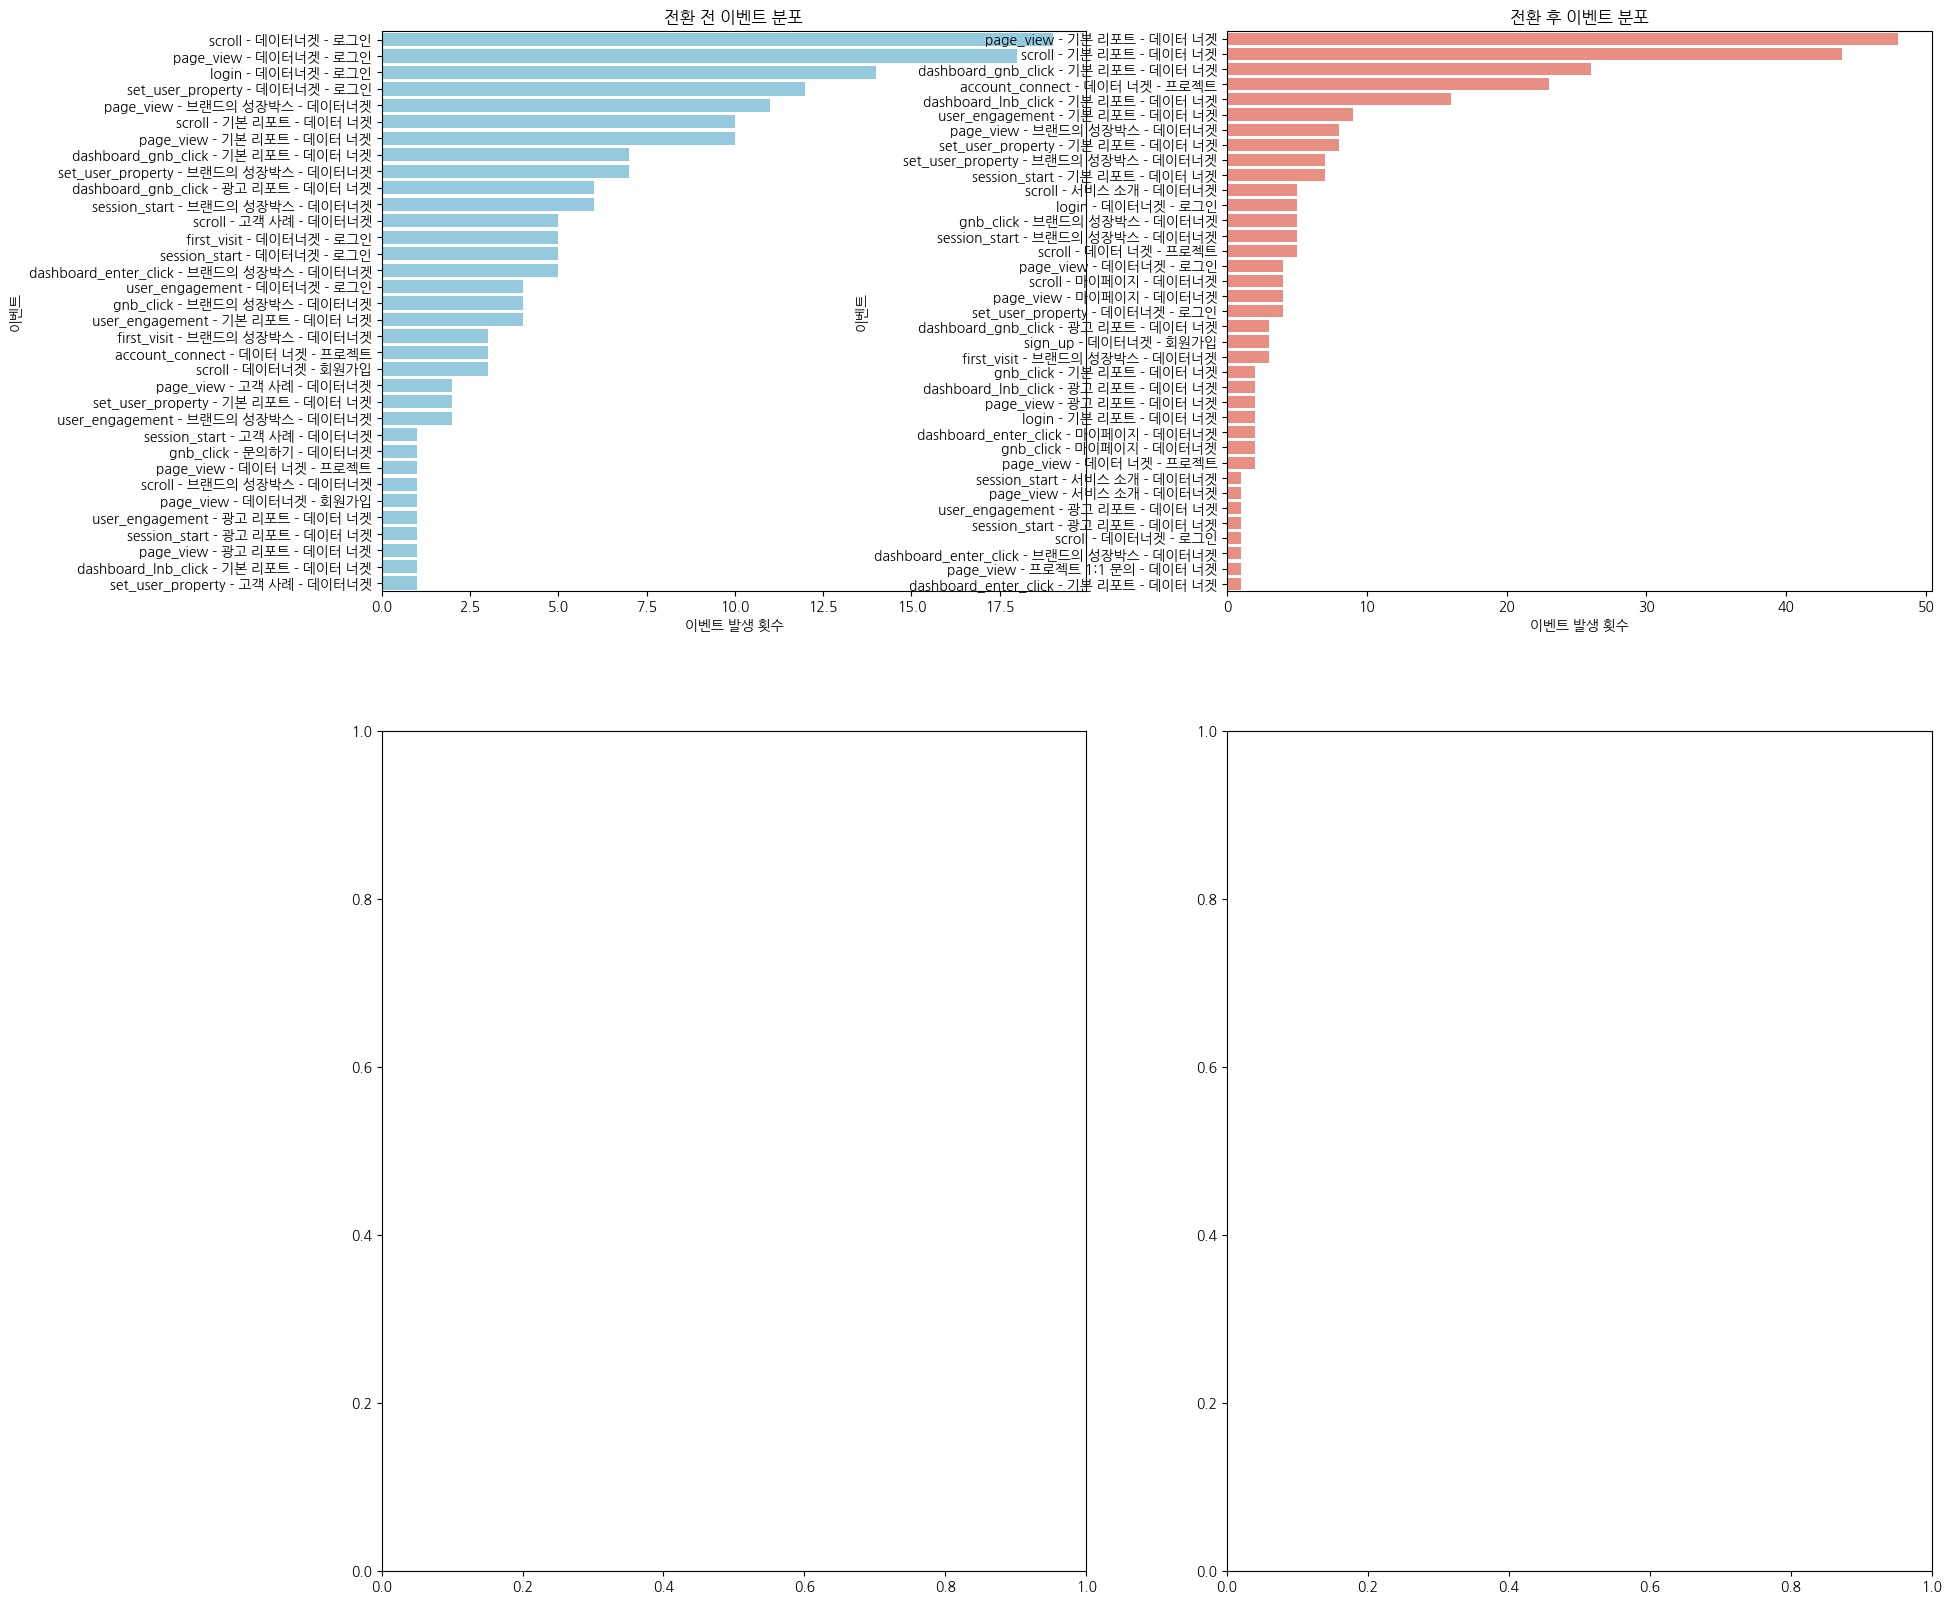

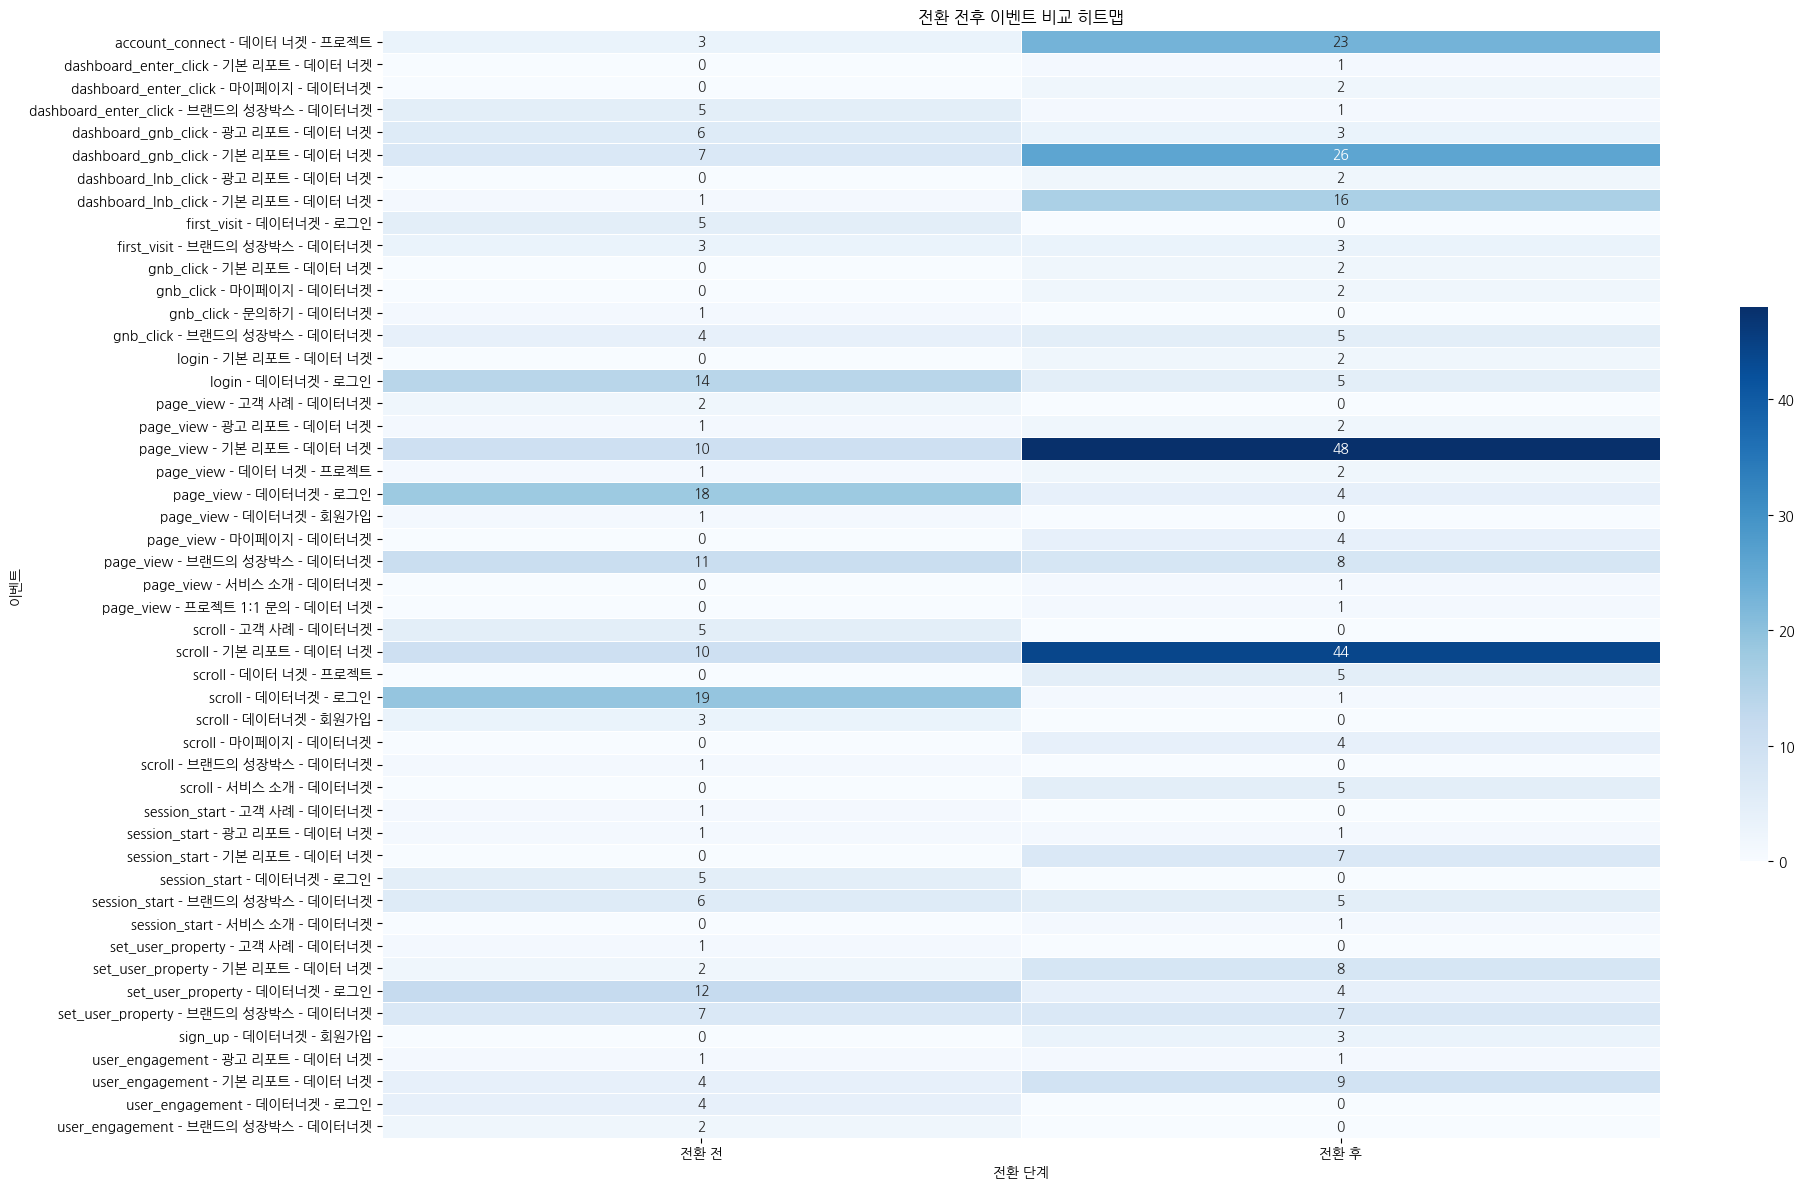

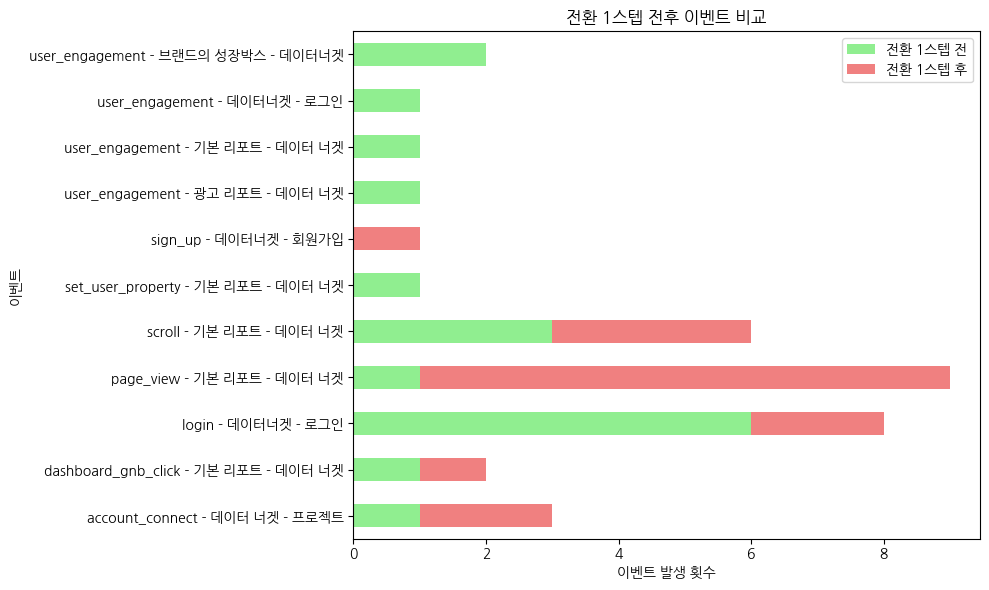

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# 데이터 로드
sequence_df = pd.read_csv('event_sequence_with_event_column.csv')

# event_sequence 열을 리스트로 파싱
def parse_event_sequence(row):
    try:
        return ast.literal_eval(row['event_sequence'])
    except (ValueError, SyntaxError):
        return []

sequence_df['parsed_sequence'] = sequence_df.apply(parse_event_sequence, axis=1)

# 각 이벤트에 인덱스를 부여하여 분석용 데이터프레임 생성
exploded_df = sequence_df.explode('parsed_sequence').reset_index()
exploded_df.rename(columns={'parsed_sequence': 'event'}, inplace=True)
exploded_df['event_index'] = exploded_df.groupby('user_pseudo_id').cumcount() + 1

# 11번째 이벤트를 전환 이벤트로 설정
exploded_df['is_conversion'] = exploded_df['event_index'] == 11

# 시퀀스 분석: 전환 전과 후 이벤트 분포
pre_conversion = exploded_df[exploded_df['event_index'] < 11]['event'].value_counts()
post_conversion = exploded_df[exploded_df['event_index'] > 11]['event'].value_counts()

# 전환 1스텝 전과 1스텝 후 이벤트 분석
step_before = exploded_df[exploded_df['event_index'] == 10]['event'].value_counts()
step_after = exploded_df[exploded_df['event_index'] == 12]['event'].value_counts()

print("전환 전 이벤트 분포:\n", pre_conversion)
print("전환 후 이벤트 분포:\n", post_conversion)
print("전환 1스텝 전 이벤트 분포:\n", step_before)
print("전환 1스텝 후 이벤트 분포:\n", step_after)

# 시각화: 가독성을 높인 깔끔한 레이아웃
fig, axes = plt.subplots(2, 2, figsize=(20, 20), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [4, 6]})

sns.barplot(y=pre_conversion.index, x=pre_conversion.values, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('전환 전 이벤트 분포')
axes[0, 0].tick_params(axis='y', rotation=0)
axes[0, 0].set_xlabel('이벤트 발생 횟수')
axes[0, 0].set_ylabel('이벤트')

sns.barplot(y=post_conversion.index, x=post_conversion.values, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('전환 후 이벤트 분포')
axes[0, 1].tick_params(axis='y', rotation=0)
axes[0, 1].set_xlabel('이벤트 발생 횟수')
axes[0, 1].set_ylabel('이벤트')

# 히트맵을 이벤트가 행, 전환이 열로 변경, 칸 높이 조정
heatmap_data = pd.DataFrame({'전환 전': pre_conversion, '전환 후': post_conversion}).fillna(0)
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('전환 전후 이벤트 비교 히트맵')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.xlabel('전환 단계')
plt.ylabel('이벤트')
plt.tight_layout()
plt.show()

step_df = pd.DataFrame({'전환 1스텝 전': step_before, '전환 1스텝 후': step_after}).fillna(0)
step_df.plot(kind='barh', stacked=True, figsize=(10, 6), color=['lightgreen', 'lightcoral'])
plt.title('전환 1스텝 전후 이벤트 비교')
plt.xlabel('이벤트 발생 횟수')
plt.ylabel('이벤트')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()